In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import metrics
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from plot_utils import plot_confusion_matrix, plot_keywords

In [2]:
#df = pd.read_csv('input/bbc-text.csv')
#df = pd.read_csv('input/news_category_same_categories_as_bbc.csv')
#df = pd.read_csv('input/5_categories_cleaned_min20words.csv')
#df = pd.read_csv('input/news_category.csv')

#df = pd.read_csv('input/bbc_news_cleaned.csv')
#df = pd.read_csv('input/5_categories_cleaned.csv')
df = pd.read_csv('input/20_categories_joined_cleaned.csv')
#df = df.sample(frac=1).reset_index(drop=True)
df.head()

,category,text
0,crime,2 mass shooting texas last week 1 tv left husb...
1,entertainment,smith join diplo nicky jam 2018 world cup offi...
2,entertainment,hugh grant marries first time age 57 actor lon...
3,entertainment,jim carrey blast castrato adam schiff democrat...
4,entertainment,julianna margulies us donald trump poop bag pi...


In [3]:
'''
#Plots the distribution of categories
fig = plt.figure(figsize=(8,6))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

#Information about data
print("Dimenzije podatkov:")
print(df.shape)
print("\nStevilo besed:")
print(df.text.str.split().str.len().sum())
print("\nKategorije:")
print(df.groupby('category').text.count())
'''

'\n#Plots the distribution of categories\nfig = plt.figure(figsize=(8,6))\ndf.groupby(\'category\').text.count().plot.bar(ylim=0)\nplt.show()\n\n#Information about data\nprint("Dimenzije podatkov:")\nprint(df.shape)\nprint("\nStevilo besed:")\nprint(df.text.str.split().str.len().sum())\nprint("\nKategorije:")\nprint(df.groupby(\'category\').text.count())\n'

In [4]:
'''
###OLD MODEL
#create tf-idf matrix
df['text'] = df['text'].astype('U')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(df.text)
labels = df['category'].factorize()[0]
features.shape

#create and train LinearSVC model, uses KFold cross validation
clf = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#cross-validation for parameter tuning
#scores = cross_val_score(clf, features, labels, scoring='accuracy', cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
'''

'\n###OLD MODEL\n#create tf-idf matrix\ndf[\'text\'] = df[\'text\'].astype(\'U\')\ntfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm=\'l2\', encoding=\'latin-1\', stop_words=\'english\')\nfeatures = tfidf.fit_transform(df.text)\nlabels = df[\'category\'].factorize()[0]\nfeatures.shape\n\n#create and train LinearSVC model, uses KFold cross validation\nclf = LinearSVC()\nX_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\n\n#cross-validation for parameter tuning\n#scores = cross_val_score(clf, features, labels, scoring=\'accuracy\', cv=10)\n#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))\n'

In [5]:
#tfidf vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')


#split data to train and test set
df['text'] = df['text'].astype('U')
features = df.text
labels = df['category'].factorize()[0]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

#transform train data and create a classifier
X_train = tfidf.fit_transform(X_train)
clf = LinearSVC()
clf.fit(X_train, y_train)

#transform test data and predict the topics
X_test = tfidf.transform(X_test)
y_pred = clf.predict(X_test)

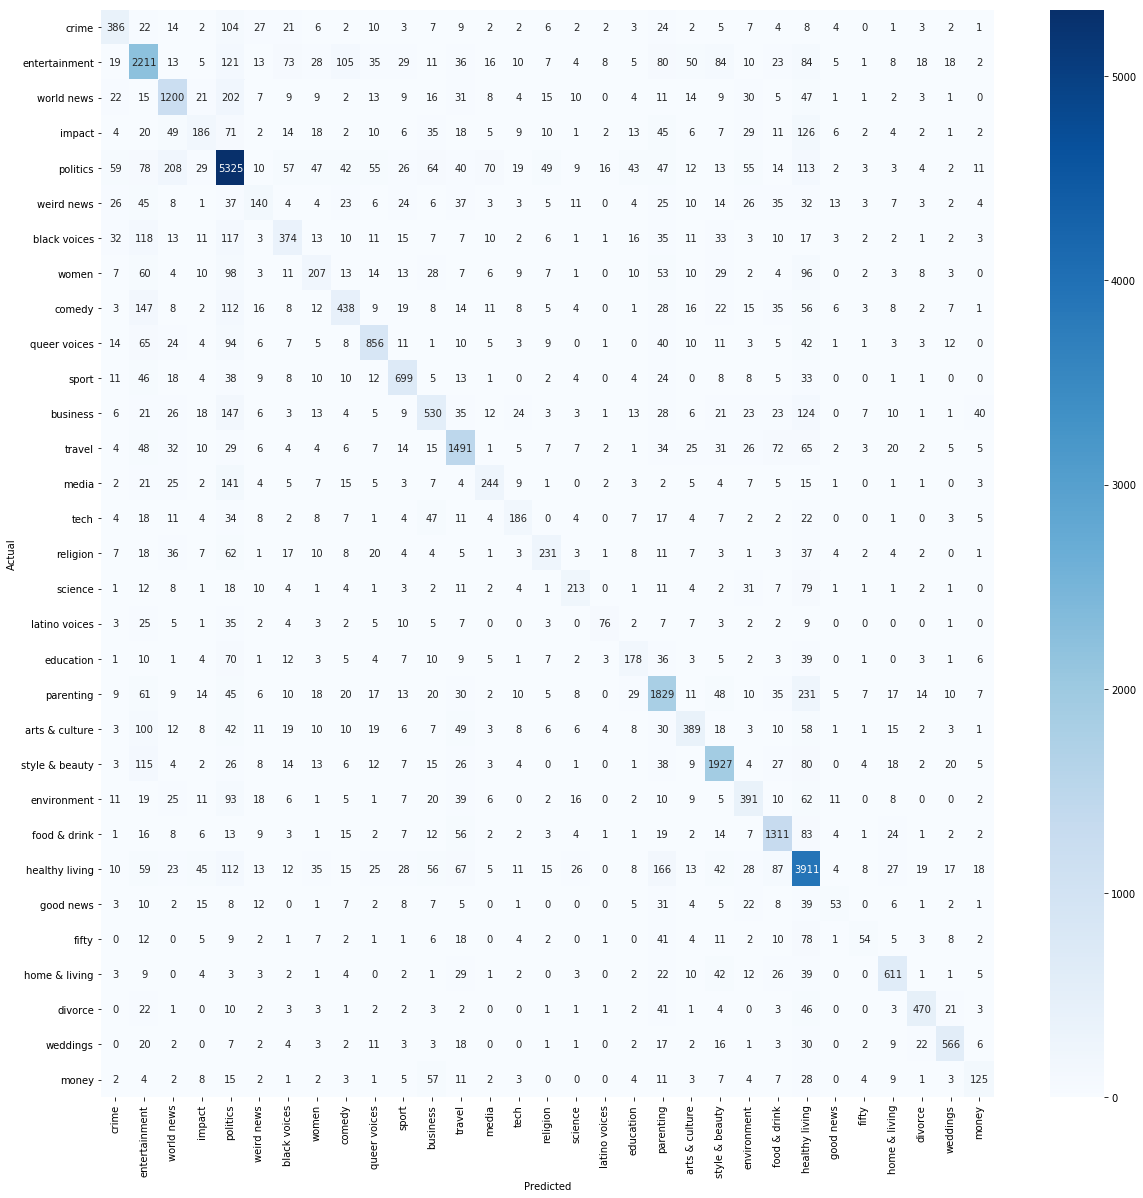

                precision    recall  f1-score   support

         crime       0.59      0.56      0.57       691
 entertainment       0.64      0.71      0.67      3132
    world news       0.67      0.70      0.68      1721
        impact       0.42      0.26      0.32       716
      politics       0.74      0.82      0.77      6525
    weird news       0.39      0.25      0.30       561
  black voices       0.53      0.42      0.47       889
         women       0.41      0.29      0.34       718
        comedy       0.55      0.43      0.48      1024
  queer voices       0.73      0.68      0.71      1254
         sport       0.70      0.72      0.71       974
      business       0.52      0.46      0.49      1163
        travel       0.70      0.75      0.72      1983
         media       0.57      0.45      0.50       544
          tech       0.54      0.44      0.48       423
      religion       0.56      0.44      0.50       521
       science       0.62      0.49      0.54  

In [6]:
#plot the confusion matrix
categories = df['category'].drop_duplicates().tolist()
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
#sns.set(font_scale=1)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#cm = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(cm, classes=categories, normalize=False)

#print metrics for the model
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

In [7]:
'''
text = " ".join(txt for txt in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(max_words=100, background_color="white", height=400, width=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("results/wordcloud_everything.png")
'''

'\ntext = " ".join(txt for txt in df.text)\nprint ("There are {} words in the combination of all review.".format(len(text)))\nwordcloud = WordCloud(max_words=100, background_color="white", height=400, width=800).generate(text)\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\nwordcloud.to_file("results/wordcloud_everything.png")\n'

In [8]:
'''
#most common words, BUT NOT MOST SIGNIFICANT FOR CATEGORY
#would need to extract the tf-idf values for categories
#2 similar wordclouds with overlapping classifications
#2 different wordclouds with almost no false classifications
ctgs = ['world news', 'politics', 'latino voices', 'black voices']
for i in range(len(ctgs)):
    text = " ".join(txt for txt in df.text[df.category == ctgs[i]])
    print(ctgs[i].capitalize())
    print ("There are {} words in the combination of all review.".format(len(text)))
    wordcloud = WordCloud(max_words=100, background_color="white", collocations=False, height=400, width=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("results/wordcloud_" + ctgs[i] + ".png")
'''

'\n#most common words, BUT NOT MOST SIGNIFICANT FOR CATEGORY\n#would need to extract the tf-idf values for categories\n#2 similar wordclouds with overlapping classifications\n#2 different wordclouds with almost no false classifications\nctgs = [\'world news\', \'politics\', \'latino voices\', \'black voices\']\nfor i in range(len(ctgs)):\n    text = " ".join(txt for txt in df.text[df.category == ctgs[i]])\n    print(ctgs[i].capitalize())\n    print ("There are {} words in the combination of all review.".format(len(text)))\n    wordcloud = WordCloud(max_words=100, background_color="white", collocations=False, height=400, width=800).generate(text)\n    plt.imshow(wordcloud, interpolation=\'bilinear\')\n    plt.axis("off")\n    plt.show()\n    wordcloud.to_file("results/wordcloud_" + ctgs[i] + ".png")\n'

In [9]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix


tf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')
corpus = df.text

tfidf_matrix =  tf.fit_transform(corpus)

feature_names = tf.get_feature_names()
'''

"\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nimport numpy as np\nfrom scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix\n\n\ntf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')\ncorpus = df.text\n\ntfidf_matrix =  tf.fit_transform(corpus)\n\nfeature_names = tf.get_feature_names()\n"

In [10]:
'''
for ctg in categories:
    dct = {}
    for i in range(len(df.text[df.category == ctg])):
        doc = df.text[df.category == ctg].index.values.astype(int)[i]
        feature_index = tfidf_matrix[doc,:].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

        for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
            if w not in dct:
                dct[w] = s

    import operator
    sorted_dct = sorted(dct.items(), key=operator.itemgetter(1), reverse=True)
    #sorted_dct[:20]

    a = []
    for i in range(100):
        a.append(sorted_dct[i][0])

    text = " ".join(txt for txt in df.text[df.category == ctg])
    text = text.split()
    txt = []
    for w in text:
        if w in a:
            txt.append(w)
    txt = " ".join(txt)
    #print(ctg.capitalize())
    #print ("There are {} words in the combination of all review.".format(len(txt)))
    wordcloud = WordCloud(max_words=100, background_color="white", collocations=False, height=400, width=800).generate(txt)
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.show()
    wordcloud.to_file("wc_tfidf/wordcloud_" + ctg + ".png")
'''

'\nfor ctg in categories:\n    dct = {}\n    for i in range(len(df.text[df.category == ctg])):\n        doc = df.text[df.category == ctg].index.values.astype(int)[i]\n        feature_index = tfidf_matrix[doc,:].nonzero()[1]\n        tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])\n\n        for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:\n            if w not in dct:\n                dct[w] = s\n\n    import operator\n    sorted_dct = sorted(dct.items(), key=operator.itemgetter(1), reverse=True)\n    #sorted_dct[:20]\n\n    a = []\n    for i in range(100):\n        a.append(sorted_dct[i][0])\n\n    text = " ".join(txt for txt in df.text[df.category == ctg])\n    text = text.split()\n    txt = []\n    for w in text:\n        if w in a:\n            txt.append(w)\n    txt = " ".join(txt)\n    #print(ctg.capitalize())\n    #print ("There are {} words in the combination of all review.".format(len(txt)))\n    wordcloud = WordCloud(max_words=1